# Random Forest - Credit Card Fraud Detection

---

## Dependencies

In [1]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import os
import joblib

---

## Datasets preparation

In [ ]:
path = '../DataSet/'

datasets = {
    "original": {
        "X_train": path + 'original-dataset/train/X.csv', "y_train": path + 'original-dataset/train/y.csv',
        "X_test": path + 'original-dataset/test/X.csv', "y_test": path + 'original-dataset/test/y.csv'
    },
    "undersampled": {
        "X_train": path + 'undersampled-dataset/train/X.csv', "y_train": path + 'undersampled-dataset/train/y.csv',
        "X_test": path + 'undersampled-dataset/test/X.csv', "y_test": path + 'undersampled-dataset/test/y.csv'
    },
    "oversampled": {
        "X_train": path + 'oversampled-dataset/train/X.csv', "y_train": path + 'oversampled-dataset/train/y.csv',
        "X_test": path + 'oversampled-dataset/test/X.csv', "y_test": path + 'oversampled-dataset/test/y.csv'
    }
}

---

## Original dataset

In [3]:
# Training set
X_train = pd.read_csv(datasets["original"]["X_train"])
y_train = pd.read_csv(datasets["original"]["y_train"])

# Test set
X_test = pd.read_csv(datasets["original"]["X_test"])
y_test = pd.read_csv(datasets["original"]["y_test"])

### Scaling

In [4]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [5]:
X_train

array([[-0.33974783, -1.95144063, -1.16681856, ..., -1.6211327 ,
         0.96676   , -0.4486209 ],
       [ 4.27773998,  1.24181171, -0.15922175, ...,  1.34827683,
        -0.71311931,  0.33519183],
       [-0.0533992 ,  0.05339701, -0.92214029, ...,  1.73038298,
        -0.15212107,  0.26753092],
       ...,
       [-0.32837128, -0.31497174, -0.07400401, ..., -0.8272693 ,
        -0.29672056, -0.59571272],
       [-0.33974783, -0.14359433, -1.50291696, ...,  0.88219506,
         1.2243654 ,  1.01984233],
       [ 0.09364469, -0.38688453,  0.62962541, ..., -0.81609192,
         0.0044092 ,  0.11724428]], shape=(199364, 30))

### Hyperparam tuning with GridSearchCV

In [6]:
if os.path.exists('grid_search_rf_original.pkl'):
    print("Loading existing grid search results...")
    grid = joblib.load('grid_search_rf_original.pkl')

else:
    print("Performing grid search for Random Forest on original dataset...")
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, 30],
        'max_features': ['sqrt', 'log2']
    }

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    rf = RandomForestClassifier(random_state=42)
    grid = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='roc_auc', cv=cv, verbose=1, n_jobs=-1)
    grid.fit(X_train, y_train)

    joblib.dump(grid, 'grid_search_rf_original.pkl')

best_params = grid.best_params_
best_score = grid.best_score_
best_estimator = grid.best_estimator_
print(f"Best parameters: {best_params}")
print(f"Best score: {best_score}")
print(f"Best estimator: {best_estimator}")

Loading existing grid search results...
Best parameters: {'max_depth': 10, 'max_features': 'log2', 'n_estimators': 300}
Best score: 0.9750547677285624
Best estimator: RandomForestClassifier(max_depth=10, max_features='log2', n_estimators=300,
                       random_state=42)


### Evaluation on test set

c:\Users\hugop\IA\ESIEE-IT\M1\PIVS\PIVS\venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\Users\hugop\IA\ESIEE-IT\M1\PIVS\PIVS\venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.86      0.77      0.81       136

    accuracy                           1.00     85443
   macro avg       0.93      0.89      0.91     85443
weighted avg       1.00      1.00      1.00     85443

Test ROC AUC Score: 0.9721106346696602
Test Confusion Matrix:
[[85290    17]
 [   31   105]]


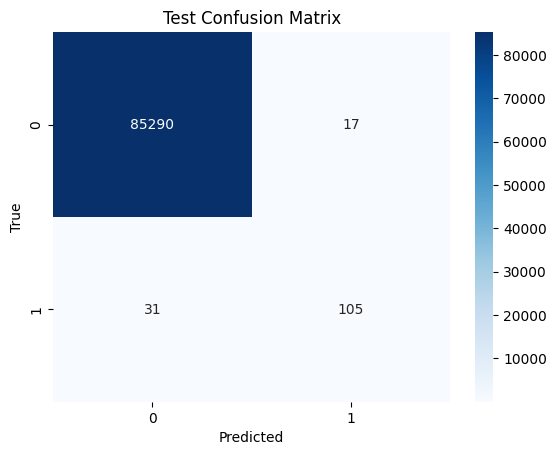

In [7]:
y_test_pred = best_estimator.predict(X_test)
y_test_pred_proba = best_estimator.predict_proba(X_test)[:, 1]

print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))
print("Test ROC AUC Score:", roc_auc_score(y_test, y_test_pred_proba))
print("Test Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Test Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

---

## Undersampled dataset

In [8]:
# Training set
X_train = pd.read_csv(datasets["undersampled"]["X_train"])
y_train = pd.read_csv(datasets["undersampled"]["y_train"])

# Test set
X_test = pd.read_csv(datasets["undersampled"]["X_test"])
y_test = pd.read_csv(datasets["undersampled"]["y_test"])

# Original test set
X_test_ori = pd.read_csv(datasets["original"]["X_test"])
y_test_ori = pd.read_csv(datasets["original"]["y_test"])

### Hyperparam tuning with GridSearchCV

In [9]:
if os.path.exists('grid_search_rf_undersampled.pkl'):
    print("Loading existing grid search results...")
    grid = joblib.load('grid_search_rf_undersampled.pkl')

else:
    print("Performing grid search for undersampled dataset...")
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, 30],
        'max_features': ['sqrt', 'log2']
    }

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    rf = RandomForestClassifier(random_state=42)
    grid = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='roc_auc', cv=cv, verbose=1, n_jobs=-1)
    grid.fit(X_train, y_train)

    joblib.dump(grid, 'grid_search_rf_undersampled.pkl')

best_params = grid.best_params_
best_score = grid.best_score_
best_estimator = grid.best_estimator_
print(f"Best parameters: {best_params}")
print(f"Best score: {best_score}")
print(f"Best estimator: {best_estimator}")

Loading existing grid search results...
Best parameters: {'max_depth': 10, 'max_features': 'log2', 'n_estimators': 200}
Best score: 0.9828060625636519
Best estimator: RandomForestClassifier(max_depth=10, max_features='log2', n_estimators=200,
                       random_state=42)


### Evaluation on undersampled test set

Test Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.95       150
           1       0.99      0.92      0.95       146

    accuracy                           0.95       296
   macro avg       0.96      0.95      0.95       296
weighted avg       0.95      0.95      0.95       296

Test ROC AUC Score: 0.9846575342465753
Test Confusion Matrix:
[[148   2]
 [ 12 134]]


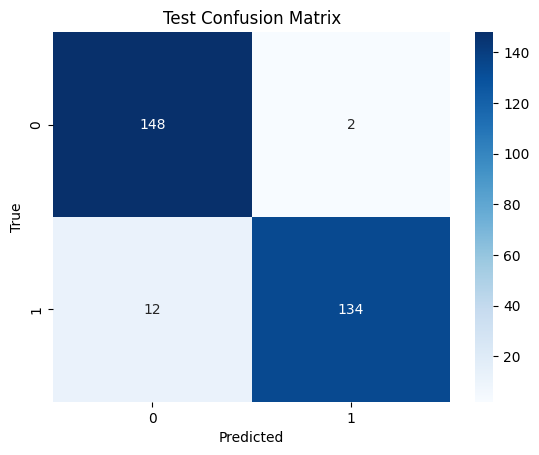

In [10]:
y_test_pred = best_estimator.predict(X_test)
y_test_pred_proba = best_estimator.predict_proba(X_test)[:, 1]

print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))
print("Test ROC AUC Score:", roc_auc_score(y_test, y_test_pred_proba))
print("Test Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Test Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### Evaluation on original test set

Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     85307
           1       0.05      0.97      0.10       136

    accuracy                           0.97     85443
   macro avg       0.53      0.97      0.54     85443
weighted avg       1.00      0.97      0.98     85443

Test ROC AUC Score: 0.994588662126203
Test Confusion Matrix:
[[82865  2442]
 [    4   132]]


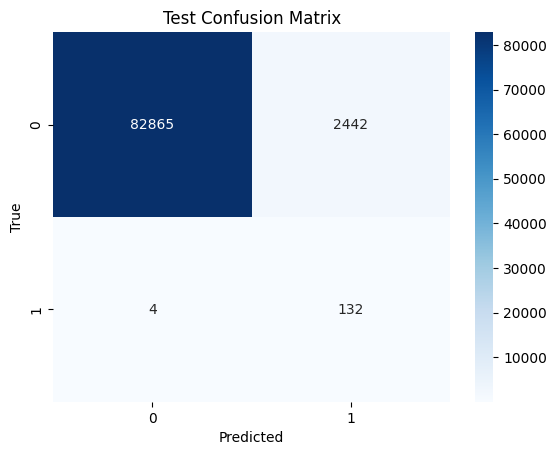

In [11]:
y_test_pred = best_estimator.predict(X_test_ori)
y_test_pred_proba = best_estimator.predict_proba(X_test_ori)[:, 1]

print("Test Classification Report:")
print(classification_report(y_test_ori, y_test_pred))
print("Test ROC AUC Score:", roc_auc_score(y_test_ori, y_test_pred_proba))
print("Test Confusion Matrix:")
print(confusion_matrix(y_test_ori, y_test_pred))
sns.heatmap(confusion_matrix(y_test_ori, y_test_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Test Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

---

## Oversampled dataset

In [12]:
# Training set
X_train = pd.read_csv(datasets["oversampled"]["X_train"])
y_train = pd.read_csv(datasets["oversampled"]["y_train"])

# Test set
X_test = pd.read_csv(datasets["oversampled"]["X_test"])
y_test = pd.read_csv(datasets["oversampled"]["y_test"])

### Scaling

In [13]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [14]:
X_train

array([[-0.40252193, -1.78801326, -0.03953088, ..., -1.82911531,
         0.31612824, -0.46003976],
       [ 4.65847268,  1.43853484,  0.34440412, ...,  1.36234378,
        -0.40930151,  0.14909356],
       [-0.08866969,  0.23772864,  0.0537014 , ...,  1.77302346,
        -0.16704315,  0.09651146],
       ...,
       [-0.40044289, -1.06346102,  0.61912474, ..., -0.38503739,
        -0.0773115 , -0.0843506 ],
       [ 0.0650186 ,  1.04677553,  0.76605044, ..., -0.36974985,
        -0.12129076, -0.09511358],
       [-0.40252193, -1.4217068 , -2.36863582, ...,  1.41343418,
         2.39361909, -3.09314089]], shape=(398016, 30))

### Hyperparam tuning with GridSearchCV

In [15]:
if os.path.exists('grid_search_rf_oversampled.pkl'):
    print("Loading existing grid search results...")
    grid = joblib.load('grid_search_rf_oversampled.pkl')

else:
    print("Performing grid search for oversampled dataset...")
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, 30],
        'max_features': ['sqrt', 'log2']
    }

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    rf = RandomForestClassifier(random_state=42)
    grid = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='roc_auc', cv=cv, verbose=1, n_jobs=-1)
    grid.fit(X_train, y_train)

    joblib.dump(grid, 'grid_search_rf_oversampled.pkl')

best_params = grid.best_params_
best_score = grid.best_score_
best_estimator = grid.best_estimator_
print(f"Best parameters: {best_params}")
print(f"Best score: {best_score}")
print(f"Best estimator: {best_estimator}")

Loading existing grid search results...
Best parameters: {'max_depth': 30, 'max_features': 'sqrt', 'n_estimators': 300}
Best score: 0.9999985368272843
Best estimator: RandomForestClassifier(max_depth=30, n_estimators=300, random_state=42)


### Evaluation on test set

c:\Users\hugop\IA\ESIEE-IT\M1\PIVS\PIVS\venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\Users\hugop\IA\ESIEE-IT\M1\PIVS\PIVS\venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     85307
           1       0.03      0.55      0.06       136

    accuracy                           0.97     85443
   macro avg       0.52      0.76      0.52     85443
weighted avg       1.00      0.97      0.98     85443

Test ROC AUC Score: 0.8341724163729753
Test Confusion Matrix:
[[82959  2348]
 [   61    75]]


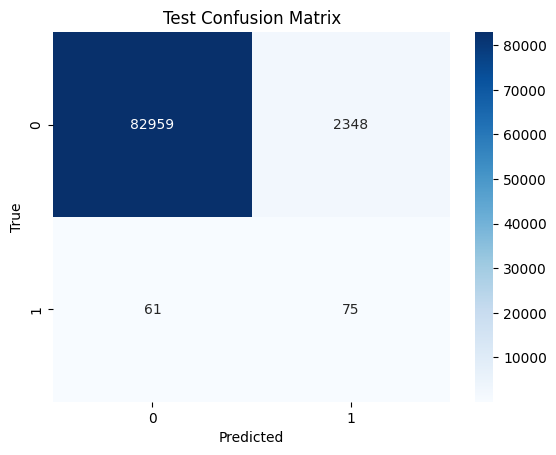

In [16]:
y_test_pred = best_estimator.predict(X_test)
y_test_pred_proba = best_estimator.predict_proba(X_test)[:, 1]

print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))
print("Test ROC AUC Score:", roc_auc_score(y_test, y_test_pred_proba))
print("Test Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Test Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

---

## Random Forest - Results comparison

| Dataset         | Best Parameters                                              | F1-Score (Class 1) | Recall (Class 1) | Precision (Class 1) | ROC AUC | Confusion Matrix                 | Observations                                                                                   |
|-----------------|--------------------------------------------------------------|---------------------|------------------|----------------------|---------|----------------------------------|------------------------------------------------------------------------------------------------|
| **Original**     | `max_depth=10`, `max_features='log2'`, `n_estimators=300` | 0.81                | 0.77             | 0.86                 | 0.972   | TN=85290, FP=17, FN=31, TP=105   | Delivers strong performance with a good balance between recall and precision.   |
| **Undersampled** | `max_depth=10`, `max_features='log2'`, `n_estimators=200` | 0.10                | 0.97             | 0.05                 | 0.994   | TN=82865, FP=2442, FN=4, TP=132       | Achieves high recall but suffers from extremely poor precision, leading to inflated false positives.                |
| **Oversampled**  | `max_depth=30`, `max_features='sqrt'`, `n_estimators=300` | 0.06                | 0.55             | 0.03                 | 0.834   | TN=82959, FP=2348, FN=61, TP=75  | Both precision and recall are weak, indicating instability in handling synthetic class balance.         |


**Global observation:**

Random Forest performs well on the original data, showing reliable classification. However, it reacts poorly to resampling, especially oversampling, where performance deteriorates significantly, suggesting sensitivity to class distribution shifts.